# Ch.11 Math Tools
In this notebook we will see some mathematical operations such as data interpolation, regression, and convex optimization. **Regression** is a technique to find the relationship between one or more independent variables and one dependent variable. Since it is known that every function can be represented by a linear combination of polynomials we can use the Gauss **least squares method** to fit the terms' parameters. The least squares method consists of minimizing the **mean squared error**, that is, the sum of squared residuals that are the difference between the value of the unknown function, e.g. computed on a linear grid, and the value of the function at the same points. **Interpolation** is used to compute the value of a function, for which we do not know the [closed form expression](https://en.wikipedia.org/wiki/Closed-form_expression), between two or more data points, usually over a regular grid or lattice. It is assumed the interpolation function to be differentiable. In finance **convex optimization** is used to fit a model, such as a portfolio, usually under some constraints. NumPy provides modules for regression and SciPy for interpolation and optimization. Regression and interpolation are particular categories of optimization problems.

In [1]:
import math
import numpy as np  
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval
import pandas as pd  
from pylab import plt, mpl
import warnings
warnings.filterwarnings('ignore')
print('Matplotlib version: {}'.format(mpl.__version__))
print('NumPy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))

Matplotlib version: 3.8.4
NumPy version: 1.26.4
Pandas version: 2.2.2


## Function approximation by polynomial interpolation
The solution is based on the NumPy [Polynomial](https://numpy.org/doc/stable/reference/routines.polynomials-package.html) module 

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50) 
y = f(x)

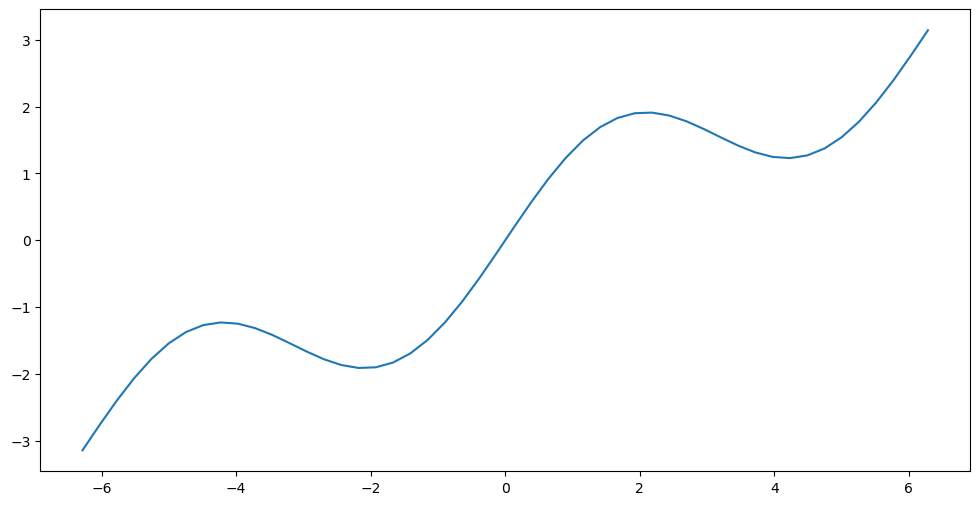

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)

In [5]:
f1_interp = Polynomial.fit(x, y, deg=1, window=(-2 * np.pi, 2 * np.pi), full=True)
f1_interp

(Polynomial([-2.69977211e-16,  4.28841952e-01], domain=[-6.28318531,  6.28318531], window=[-6.28318531,  6.28318531], symbol='x'),
 [array([21.03238686]), 2, array([1., 1.]), 1.1102230246251565e-14])

In [6]:
r1y = f1_interp[0](x)

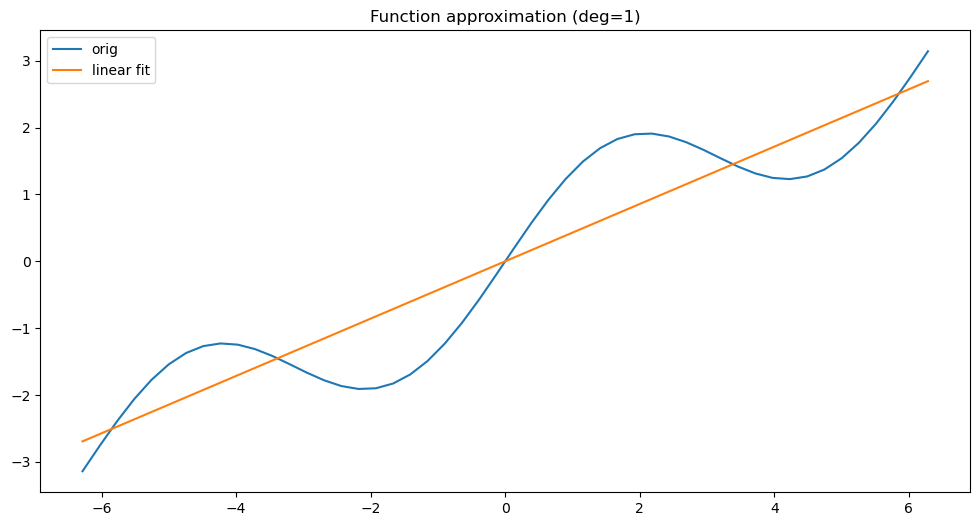

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation (deg=1)')
ax.plot(x, y, label='orig')
ax.plot(x, r1y, label='linear fit')
plt.legend(loc=0)

In [8]:
f5_interp = Polynomial.fit(x, y, deg=5, window=(-2 * np.pi, 2 * np.pi), full=True)
f5_interp

(Polynomial([-1.85332937e-15,  1.11425209e+00,  1.25613233e-16, -6.82525072e-02,
        -6.57491881e-18,  1.37920761e-03], domain=[-6.28318531,  6.28318531], window=[-6.28318531,  6.28318531], symbol='x'),
 [array([2.69412578]),
  6,
  array([1.67645134, 1.59568047, 0.65795415, 0.42968039, 0.14456894,
         0.06989757]),
  1.1102230246251565e-14])

In [9]:
r5y = f5_interp[0](x)

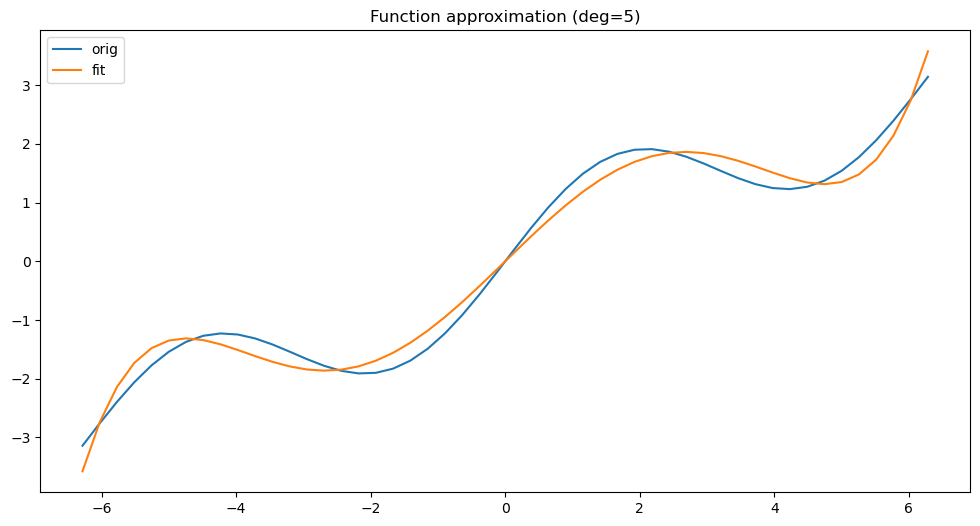

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation (deg=5)')
ax.plot(x, y, label='orig')
ax.plot(x, r5y, label='fit')
plt.legend(loc=0)

## Function approximation by non-polynomial basis functions
The solution is based on the NumPy [Linear Algebra](https://numpy.org/doc/2.3/reference/routines.linalg.html) module. If we know the form of one or more of the terms of the unknown function we can use it as a basis function to greatly improve the result of the approximtion. In this example if we know that our unknown function depends linearly on a sinusoidal function we can use this information to approximate the unknown function pratically without error.  

In [30]:
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = np.sin(x) 
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1  

In [31]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0] 
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [32]:
ry = np.dot(reg, matrix)

We can know whether the fit to the unknown function is perfect

In [38]:
print('The fit of the unknown function is perfect ? {}'.format(np.allclose(f(x), ry)))

The fit of the unknown function is perfect ? True


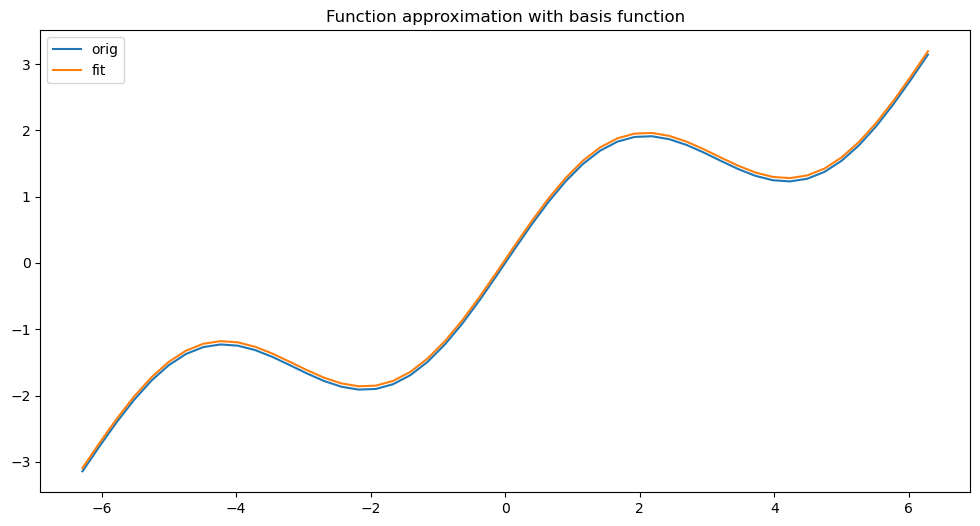

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation with basis function')
ax.plot(x, y, label='orig')
ax.plot(x, ry + 0.05, label='fit')
plt.legend(loc=0)

## Regression of noisy data

In [50]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

In [54]:
f_interp = Polynomial.fit(xn, yn, deg=7, window=(-2 * np.pi, 2 * np.pi), full=True)
ry = f_interp[0](x)

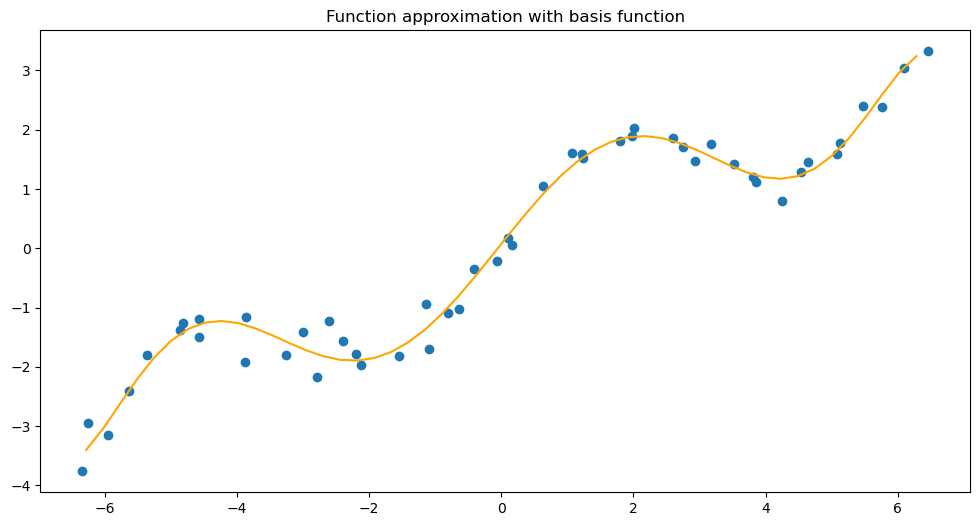

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation with basis function')
ax.scatter(xn, yn)
ax.plot(x, ry, color='orange')

## 3D regression
We may want to find the relationship between two independent variables, x and y, and a dependent one z = f(x,y). We first define and plot a 3D funzion, and then we find an approximation function. 

$$z(x,y) = \sin{x} + \frac{1}{4} x + \sqrt{y} + \frac{1}{20} y^2$$

In [2]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [12]:
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

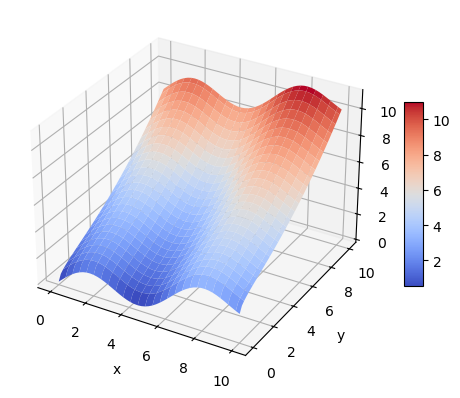

In [13]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=10);

We use some information about the form of the function to be approximated.

In [14]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [15]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]
RZ = np.dot(matrix, reg).reshape((50, 50))

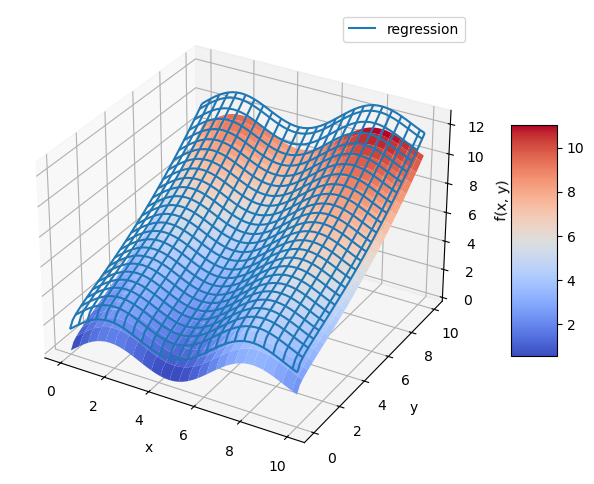

In [19]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 6))
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)  
surf2 = ax.plot_wireframe(X, Y, RZ + 1.5, rstride=2, cstride=2,
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5, ax=ax);

## Interpolation
Interpolation can be used to smooth a complex or non differentiable function or to compute the values of an unknown function between two or more data points on a grid. We use the [SciPy](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#tutorial-interpolate) module for interpolation and linear spline interpolation to compute the value of the function between pairs of data points.

In [30]:
from scipy.interpolate import splrep

In [31]:
def f(x):
    return np.sin(x) + 0.5 * x

In [41]:
num_grid_points = 25
x = np.linspace(-2 * np.pi, 2 * np.pi, num_grid_points)
y = f(x)

We can choose the degree of the interpolation function between two data points by setting the argument k. With k=1 we choose a linear function to interpolate between two data points. In this case the result of a spline interpolation is the coefficient and the constant.

In [34]:
ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

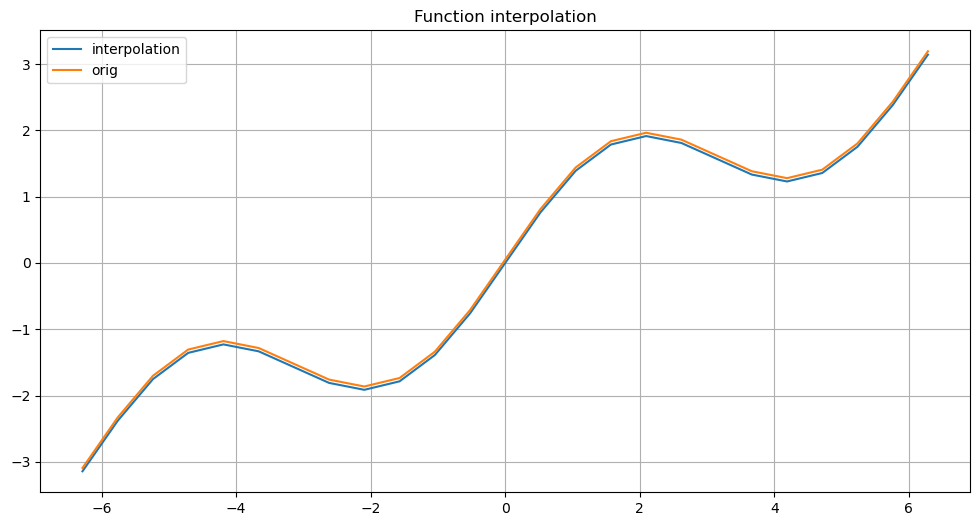

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function interpolation')
ax.plot(x, iy, label='interpolation')
ax.plot(x, y + 0.05, label='orig')
ax.legend(loc=0)
ax.grid(True)

## Convex optimization
We often may have a function with parameters to be set so that it fits well with the available data. An optimization problem can be unconstrained when there are no constraints and we just want to find the global or local minimum or maximum of the objective function, or constrained when we want to achieve the same result but under some constraints expressed as one or more inequalities. We use the [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) module from SciPy to perform the optimization. 

In [48]:
def fm(p):
    x, y = p
    return (np.sin(x) + np.sin(y) + 0.05 * x ** 2 + 0.05 * y ** 2)

In [49]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

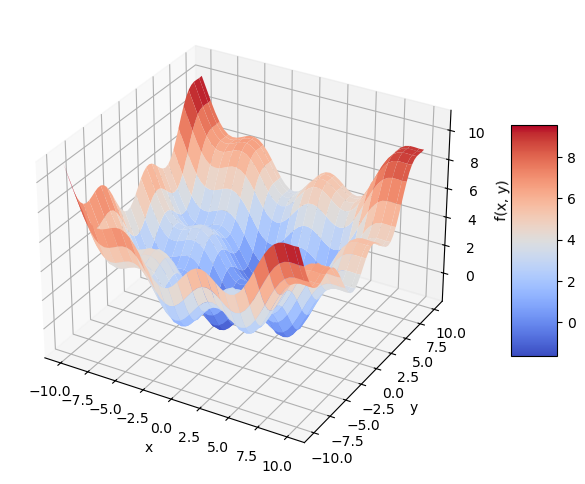

In [50]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 6))
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Global optimization
The goal of global optimization is to find the lowest minimum (largest maximum) of an objective function over a regular multidimensional grid, e.g. 2D. The [SciPy brute()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute) optimization method evaulates a function over all the grid points. Its accuracy and the compute time clearly depends on the number of the grid nodes. As an example we plot a convex function that will be optimized 
$$z = \sin x + \sin y + \frac{1}{20} x^2 + \frac{1}{20} y^2$$

In [17]:
x = np.linspace(-10.0, 10.1, 5)
y = np.linspace(-10.0, 10.1, 5)
X, Y = np.meshgrid(x, y)

In [18]:
def f(x, y):
    return np.sin(x)  + np.sin(y) + 0.05 * x ** 2 + 0.05 * y ** 2

In [19]:
z = f(X, Y)

Matplotlib version, 3.10, allows to rotate the [view angle](https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html) with the mouse 

Text(0.5, 0.5, 'y')

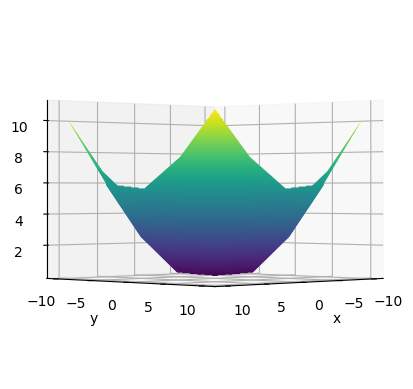

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=0, azim=45, roll=0)
#ax.contour3D(X, Y, z, 200)
ax.contour(X, Y, z, 200)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [2]:
import scipy.optimize as sco  

In [3]:
def fo(p):
    x, y = p
    z = np.sin(x)  + np.sin(y) + 0.05 * x ** 2 + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

We set the length of the x and y dimension to 5, i.e. a 2D grid of 25 points.

In [13]:
output = True
x_range = (-10, 10.1, 5)
y_range = (-10, 10.1, 5)

In [14]:
opt = sco.brute(fo, (x_range, y_range), finish=None)  
opt

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

The optimization method returns the point of minimum value

In [16]:
output = False
fo(opt)

0.0

We can see that if we set the length to 0.1 there is a minimum below 0.0

In [54]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [60]:
fo(opt1)

 -1.4000 |  -1.4000 |  -1.7749


-1.7748994599769203

### Local optimization
There might be more than one (local) minimum of a function within its domain.

In [61]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=25, maxfun=200)  

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757
 -1.4316 |  -1.4307 |  -1.7757
 -1.4273 |  -1.4258 |  -1.7757
 -1.4239 |  -1.4285 |  -1.7757
 -1.4288 |  -1.4266 |  -1.7757
 -1.4285 |  -1.4297 |  -1.7757
 -1.4276 |  -1.4267 |  -1.7757
 -1.4258 |  -1.4289 |  -1.7757
 -1.4281 |  -1.4272 |  -1.7757
 -1.4286 |  -1.4252 |  -1.7757
 -1.4274 |  -1.4279 |  -1.7757
 -1.4279 |  -1.4283 |  -1.7757
 -1.4277 |  -1.4271 |  -1.7757
Optimiza

In [62]:
opt2

array([-1.42743423, -1.42786531])

In [63]:
fm(opt2)

-1.7757255920546628

In [64]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained optimization
An optimization problem may have not only an objective function but also constraints, represented mathematically as equalities or inequalities. For example in [portfolio optimization](https://colab.research.google.com/github/cvxgrp/cvx_short_course/blob/master/book/docs/applications/notebooks/portfolio_optimization.ipynb) we might want to find the weights $w$ of a set of assets of a portfolio to maximize its return at a certain level of risk subject to the conditions that the sum of the weights is one and none of them are zero

$$P = w^T \mu - \frac{\lambda}{2} w^T \Sigma w$$

subject to 

$$1^T w = 1, w \ge 0$$

Another problem in finance is the maximization of an investor's utility function. For example 

$$U(w_1) = p\sqrt{w_{1u}} + (1 - p)\sqrt{w_{1d}}$$

subject to

$$w_1 = ar_a + br_b$$
$$w_0 \ge aq_a + bq_b$$
$$a, b \ge 0 $$

In [2]:
import math
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

In [3]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})

In [4]:
bnds = ((0, 1000), (0, 1000))

In [8]:
result = sco.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

## Numerical integration
SciPy provides the [integrate](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) sub-module for numerical integration. As an example we compute the integral of the function
$$y = \sin x + \frac{1}{2} x$$

in the range [0.5, 9.5]

In [30]:
import scipy.integrate as sci
from matplotlib.patches import Polygon

In [31]:
def f(x):
    return np.sin(x) + 0.5 * x

In [32]:
x = np.linspace(0, 10)
y = f(x)

In [33]:
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b)  
Iy = f(Ix)  

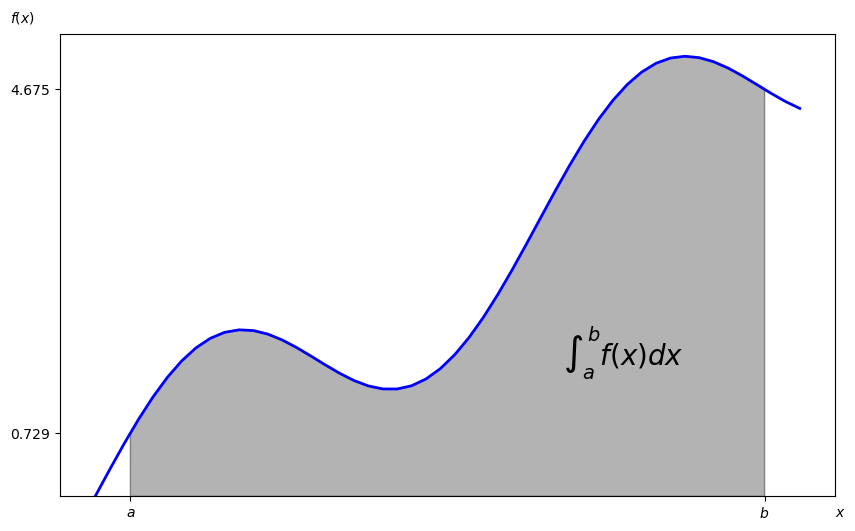

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);

## Python packages
* [CVXPY Convex optimization, for everyone.](https://www.cvxpy.org/index.html)
* [PYOMO Python-based, open-source optimization](https://www.pyomo.org/)

## References
* [SciPy - Smoothing splines](https://docs.scipy.org/doc/scipy/tutorial/interpolate/smoothing_splines.html#tutorial-interpolate-splxxx)
* [O' Connor - Splines: An Introduction](https://www.kaggle.com/code/wumanandpat/splines-an-introduction)
* [Boyd, Vandenberghe - Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/)
* [Palomar - Portfolio Optimization: Theory and Application](https://portfoliooptimizationbook.com/)
* [Fourer, Gay, Kernighan - AMPL: A Modeling Language for Mathematical Programming](https://ampl.com/resources/books/ampl-book/)
* [Postek, Zocca, Gromicho, Kantor - Hands-On Mathematical Optimization with Python](https://ampl.com/mo-book/index.html)